In [1]:
from datasets import load_dataset
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re

In [13]:
ds = load_dataset("Salesforce/wikitext", "wikitext-103-v1", streaming= True, split= 'test')


In [14]:
ds

IterableDataset({
    features: ['text'],
    n_shards: 1
})

In [15]:
df = pd.DataFrame(ds)
df

,text
0,
1,= Robert Boulter = \n
2,
3,"Robert Boulter is an English film , televisio..."
4,"In 2006 , Boulter starred alongside Whishaw i..."
...,...
4353,
4354,"In the decades since its release , The Hustle..."
4355,Paul Newman reprised his role as Fast Eddie F...
4356,The Hustler is credited with sparking a resur...


In [16]:
def normalizer(s: str):
    s = s.lower()
    s = re.sub(r'[^\w\s]', ' ', s) 
    s = re.sub(r'\d+', ' ', s)
    s = re.sub(r'\s+', ' ', s)
    
    s = s.strip()
    return s

In [17]:
df["text"] = df["text"].apply(normalizer)

In [18]:
df.drop(df[df["text"] == ""].index, inplace=True)

In [19]:
df

,text
1,robert boulter
3,robert boulter is an english film television a...
4,in boulter starred alongside whishaw in the pl...
6,career
11,in boulter had a guest starring role on the te...
...,...
4350,afi s top sports film
4352,legacy
4354,in the decades since its release the hustler h...
4355,paul newman reprised his role as fast eddie fe...


In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df.to_csv("data/test.csv", index=False)

<Axes: >

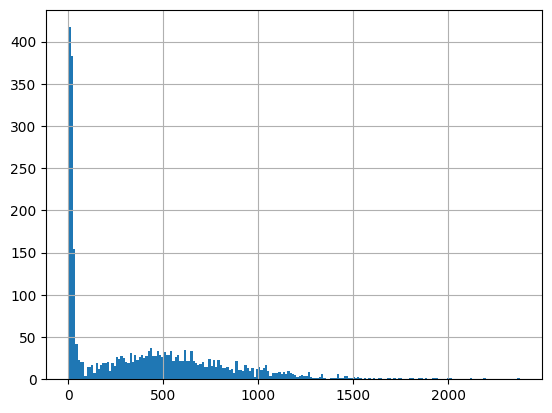

In [22]:
df['text'].str.len().hist(bins=200)